To demonstrate the efficienty of the algorithms, let $f(x)=\sin(x/2)\cos(x/2)$ with $0\leq x \leq 3\pi$, and this functions can be discretized over an interval $[a,b] =   [0,3\pi]$. For example, we can set $N = 100$ and let $\Delta x = (3\pi-0)/N$. Thus,

In [1]:
import numpy as np
N = 100
a = 0
b = 3*np.pi
dx = (b - a)/N
x = np.arange(a, b, dx)

Alternatively, we could simply this process by using linspace

```Python
x = np.linspace(a, b, N)
```

Discritizing the function



In [2]:
f= lambda x: np.sin(x/2)*np.cos(x/2)
y = f(x)

To create a nosiy version of this fuction, one can consider adding noise to the data using [numpy.random.normal](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) given $\mu = 0$ and $\sigma = 0.1$, mean and standard deviation respectively.

In [3]:
mu = 0
sigma = 0.1
noise = np.random.normal(mu, sigma, len(x))
y_noise = y + noise

# Savitzky-Golay Filter

## Savitzky-Golay Filter 1D

Using [Savitzky–Golay filter](https://en.wikipedia.org/wiki/Savitzky%E2%80%93Golay_filter) from scipy [package](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.signal.savgol_filter.html), we can reduce the impact of the generated random noise.

Using a fourth-order polynomial, we get

In [4]:
from scipy import signal
y_filtered = signal.savgol_filter(y_noise, window_length = 23, polyorder = 4)

Let's plot the data.

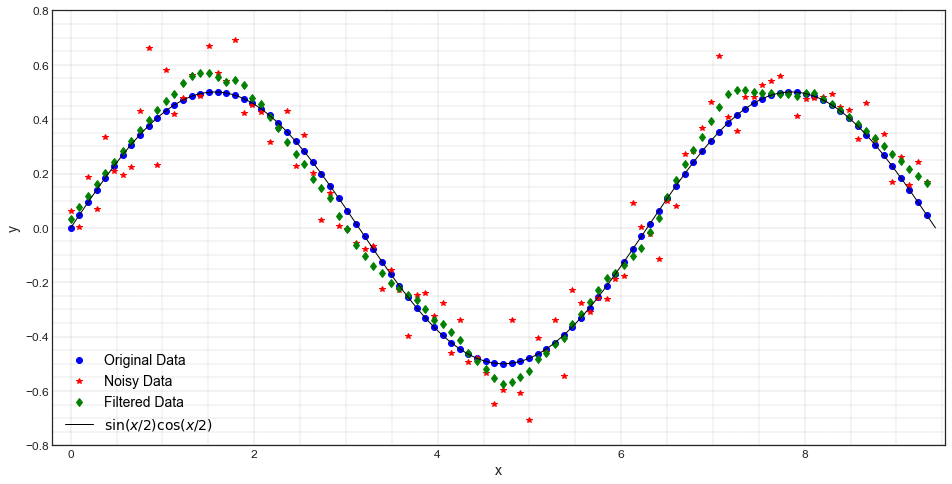

In [5]:
from NA_Notes import Reg_Method_Fig1
Reg_Method_Fig1(x, y, y_noise, y_filtered, a, b, f, N)

Furthermore, let's use $\|.\|_{\infty}$ for mesuring the accuracy.

In [6]:
from IPython.display import display, Latex
from numpy import linalg as LA
display(Latex(r'\|y-y_{noise}\|_{\infty} = %.4f' % LA.norm(np.abs(y-y_filtered), np.inf)))

<IPython.core.display.Latex object>

## Savitzky-Golay Filter 2D

For two dimmentional, we can use the following function from [this link](https://scipy.github.io/old-wiki/pages/Cookbook/SavitzkyGolay)

In [7]:
from NA_Notes import sgolay2d, Reg_Method_Fig2
r = 500.
f= lambda x, y: np.cos((x**2)/r + (y**2)/r)

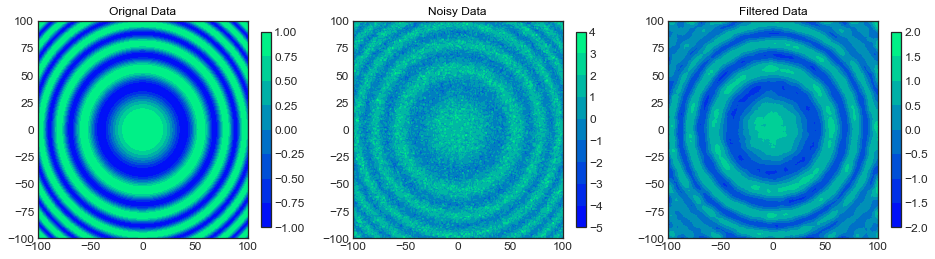

In [8]:
mu = 0
sigma = 0.8
x, y = x, y = np.mgrid[-100:101, -100:101]
z = f(x,y)
z_noise = z+ np.random.normal(mu, sigma, size=x.shape)
z_filtered = sgolay2d(z_noise, window_size = 23, order = 4)

Reg_Method_Fig2(x, y, z, z_noise, z_filtered)

In [9]:
display(Latex(r'\|z-z_{noise}\|_{\infty} = %.4f' % LA.norm(np.abs(z-z_noise), np.inf)))
display(Latex(r'\|z-z_{filtered}\|_{\infty} = %.4f' % LA.norm(np.abs(z-z_filtered), np.inf)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>